# PART 2: Stats of the Country Music

First of all we have to collect the data from wikipedia in order to create the network.

-- ask if code needed

In [9]:
# required libraries
import re
import networkx as nx
import os
import matplotlib.pyplot as plt

In [2]:
# assuming data already collected and stored in a folder
# regex to get the wiki links from a string
regex_wiki = re.compile(r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]')


# method to get the artist related to a given artist
def get_links(data: str):
    matches = regex_wiki.findall(data)

    # remove artist that contains semi-colon
    filtered = [match for match in matches if ':' not in match]

    # remove duplicates
    no_duplicates = list(set(filtered))

    if 'country music' in no_duplicates:
        no_duplicates.remove('country music')

    reencoded = [value.encode('utf-8').decode('unicode_escape') for value in no_duplicates]

    artists = [value.replace(' ', '_') for value in reencoded]
    artists = [value.replace('/', '_') for value in artists]
    artists = [value.replace('"', '') for value in artists]

    return artists

In [3]:
# method to count the words in a given string
def count_words(text):
    # Use regex to match words, which are sequences of alphanumeric characters
    words = re.findall(r'\b\w+\b', text)
    return len(words)

In [5]:
# get all the files in the folder
files = os.listdir('../lab4/artist_data')
print(len(files))

2098


In [6]:
# create the final nodes
# for each filename remove the .txt
nodes = [file.replace('.txt', '') for file in files]

# create a DiGraph
G = nx.DiGraph()

# add the nodes
G.add_nodes_from(nodes)

for file in files:
    node = file.replace('.txt', '')

    with open('../lab4/artist_data/{}'.format(file)) as f:
        data = f.read()

    len_content = count_words(data)

    # save in the node the number of words
    G.nodes[node]['len_content'] = len_content

    links = get_links(data)

    for link in links:
        # print('Link: {}'.format(link))
        if link in nodes:
            G.add_edge(node, link)

# number of nodes
print(G.number_of_nodes())
# number of edges
print(G.number_of_edges())

2098
17691


In [7]:
# Simple network statistics and analysis

# Degree Distribution
def plot_degree_distributions(G):
    in_degrees = [G.in_degree(n) for n in G.nodes()]
    out_degrees = [G.out_degree(n) for n in G.nodes()]

    plt.figure(figsize=(12, 5))

    # Plot In-Degree Distribution
    plt.subplot(1, 2, 1)
    plt.hist(in_degrees, bins=20, color='blue', alpha=0.7)
    plt.title("In-Degree Distribution")
    plt.xlabel("In-Degree")
    plt.ylabel("Frequency")

    # Plot Out-Degree Distribution
    plt.subplot(1, 2, 2)
    plt.hist(out_degrees, bins=20, color='green', alpha=0.7)
    plt.title("Out-Degree Distribution")
    plt.xlabel("Out-Degree")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

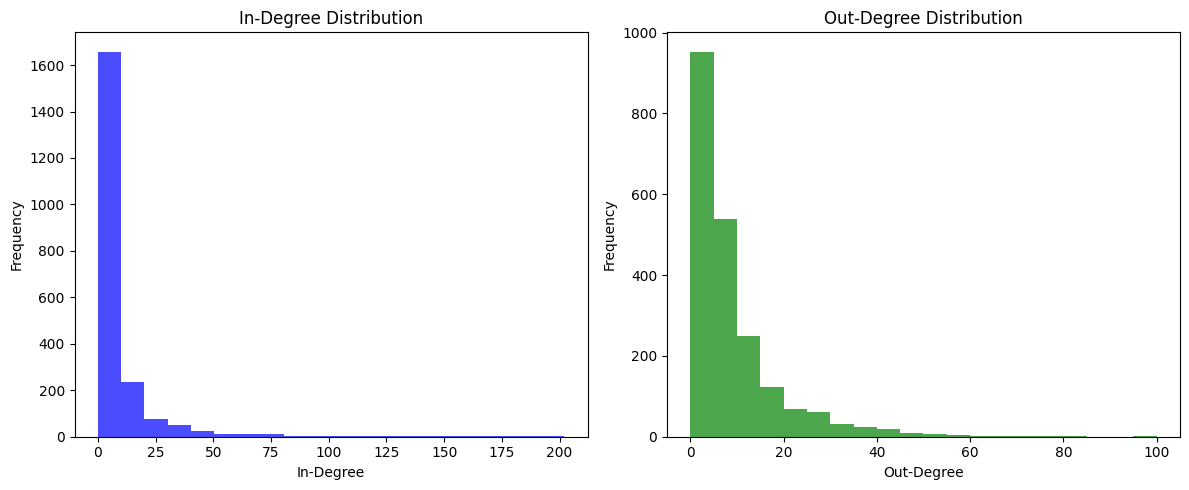

In [10]:
plot_degree_distributions(G)

In [11]:
def compare_out_degree_to_random(G):
    N = G.number_of_nodes()
    E = G.number_of_edges()

    # Generate random network with the same number of nodes and edges
    random_graph = nx.gnm_random_graph(N, E, directed=True)
    random_out_degrees = [random_graph.out_degree(n) for n in random_graph.nodes()]
    
    original_out_degrees = [G.out_degree(n) for n in G.nodes()]

    plt.hist(original_out_degrees, bins=20, alpha=0.7, color='green', label="Original Network")
    plt.hist(random_out_degrees, bins=20, alpha=0.7, color='red', label="Random Network")
    plt.title("Out-Degree Distribution Comparison")
    plt.xlabel("Out-Degree")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

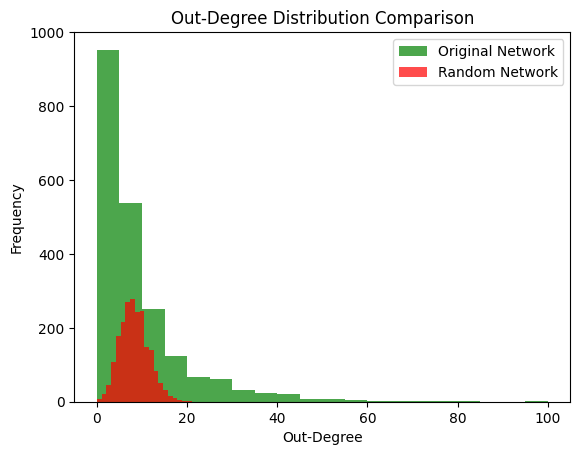

In [12]:
compare_out_degree_to_random(G)

In [13]:
def compare_in_degree_to_scalefree(G):
    N = G.number_of_nodes()

    # Generate scale-free network
    scale_free_graph = nx.barabasi_albert_graph(N, 1)  # 'm' is the number of edges to attach from a new node to existing ones
    scale_free_graph = scale_free_graph.to_directed()  # Convert to directed graph

    scale_free_in_degrees = [scale_free_graph.in_degree(n) for n in scale_free_graph.nodes()]
    original_in_degrees = [G.in_degree(n) for n in G.nodes()]

    plt.hist(original_in_degrees, bins=20, alpha=0.7, color='blue', label="Original Network")
    plt.hist(scale_free_in_degrees, bins=20, alpha=0.7, color='orange', label="Scale-Free Network")
    plt.title("In-Degree Distribution Comparison")
    plt.xlabel("In-Degree")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

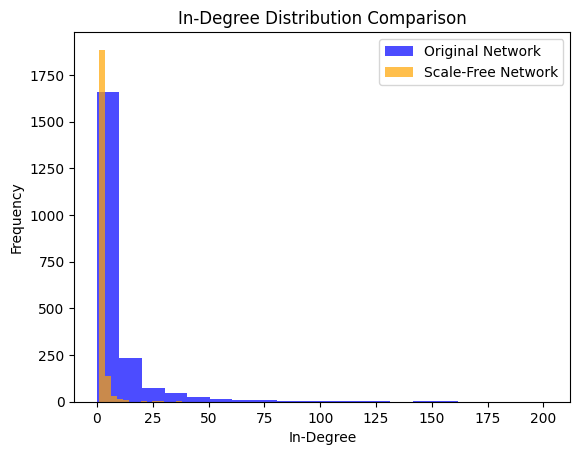

In [14]:
compare_in_degree_to_scalefree(G)

In [15]:
in_degrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
out_degrees = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Performers by In-Degree:")
for performer, in_deg in in_degrees:
    print(f"{performer}: {in_deg}")

print("\nTop 5 Performers by Out-Degree:")
for performer, out_deg in out_degrees:
    print(f"{performer}: {out_deg}")

Top 5 Performers by In-Degree:
Willie_Nelson: 202
Johnny_Cash: 184
Elvis_Presley: 177
Dolly_Parton: 162
George_Jones: 156

Top 5 Performers by Out-Degree:
Hillary_Lindsey: 100
Pam_Tillis: 82
Randy_Travis: 75
Vince_Gill: 71
Patty_Loveless: 68


In [16]:
pages_with_content = [(n, G.nodes[n]['len_content']) for n in G.nodes() if 'len_content' in G.nodes[n]]
top_10_longest = sorted(pages_with_content, key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Pages with Longest Wiki Entries:")
for page, length in top_10_longest:
    print(f"{page}: {length} words")

Top 10 Pages with Longest Wiki Entries:
Beyoncé: 64599 words
Taylor_Swift: 56927 words
Miley_Cyrus: 51832 words
Justin_Bieber: 51252 words
Carrie_Underwood: 46003 words
Justin_Timberlake: 45283 words
Demi_Lovato: 44703 words
Bob_Dylan: 41834 words
Ed_Sheeran: 36912 words
Elvis_Presley: 34593 words


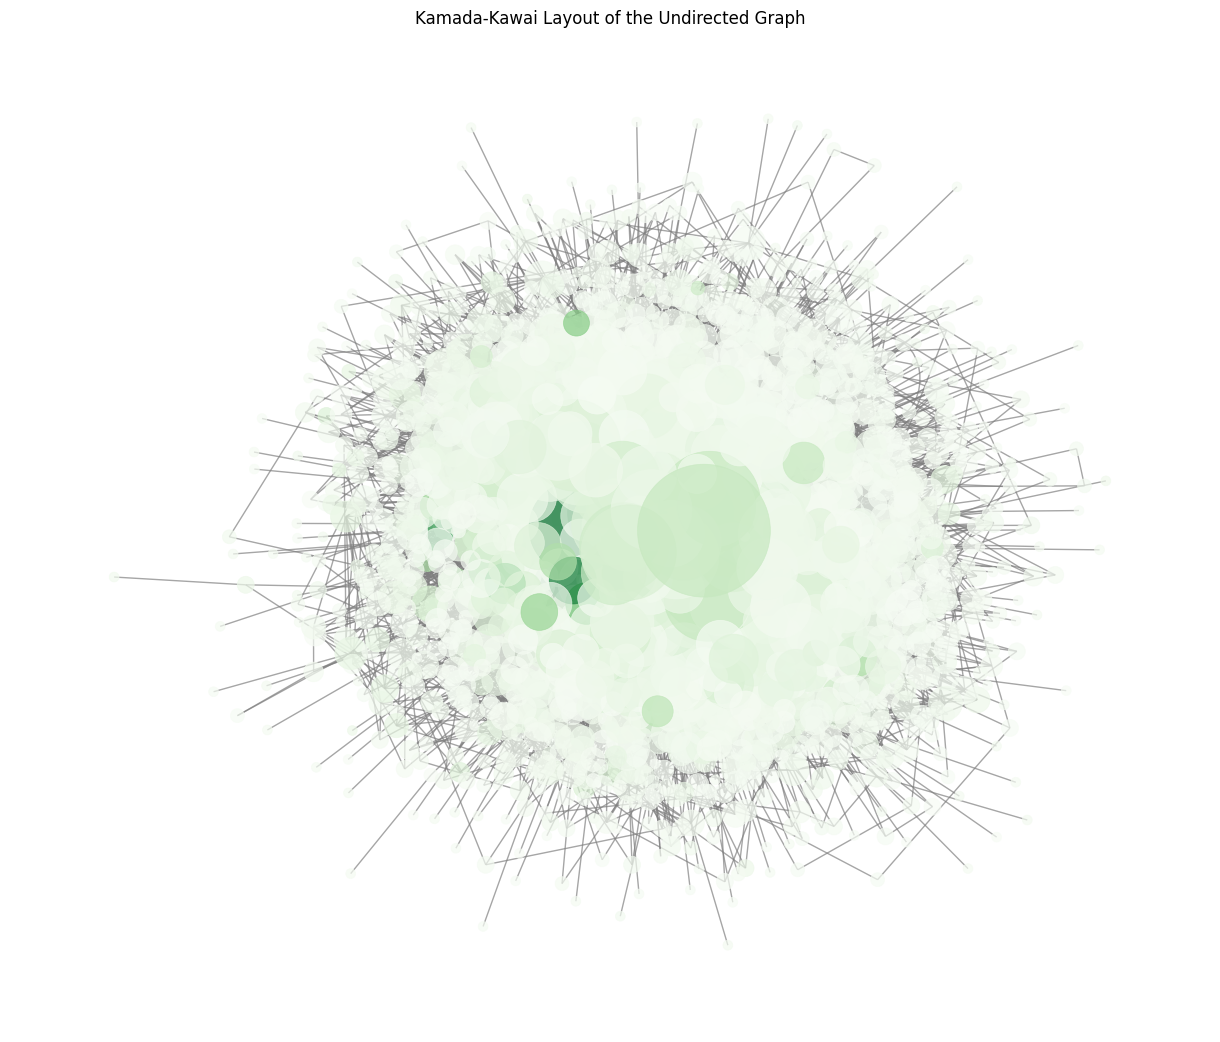

In [18]:
# Visualization of the network
G_undir = G.to_undirected()

# plot the network
degrees = dict(G_undir.degree())

# Normalize node sizes based on degree (you can tweak scaling factor if necessary)
node_sizes = [degrees[node] * 50 for node in G_undir.nodes()]

# Get 'length_of_content' attribute for each node, if it exists
content_lengths = [G.nodes[node].get('len_content', 0) for node in G_undir.nodes()]

# Normalize content lengths for color mapping
norm = plt.Normalize(vmin=min(content_lengths), vmax=max(content_lengths))
cmap = plt.get_cmap('Greens')  # Choosing a simple sequential colormap

# Draw the network using Kamada-Kawai layout
plt.figure(figsize=(12, 10), facecolor='black')
pos = nx.kamada_kawai_layout(G_undir)

# Draw the graph with customized node sizes and colors
nx.draw(
    G_undir, 
    pos, 
    with_labels=False,  # Remove labels for clarity
    node_size=node_sizes,  # Size of nodes based on degree
    node_color=content_lengths,  # Color based on 'length_of_content' attribute
    cmap=cmap,  # Colormap for node colors
    edge_color='gray',  # Color of edges
    alpha=0.7,  # Transparency of edges
    linewidths=0.5  # Width of edges
)

# Add a color bar to indicate content length scale
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array(content_lengths)
# cbar = plt.colorbar(sm)
# cbar.set_label('Length of Content')


plt.title("Kamada-Kawai Layout of the Undirected Graph")
plt.gca().set_facecolor('black')  # Set axis background to black
plt.tick_params(colors='white')  # White tick labels
plt.show()